# Title

## Install package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
import torch
from torch.utils.data import Subset
import torch.nn as nn

import wandb

import src
import importlib
from src import *

importlib.reload(src)

<module 'src' from '/Users/typeorigin/PythonProjects/FReLU-torch/src/__init__.py'>

In [2]:
wandb.login()

wandb: Currently logged in as: gangchu-cg (liight). Use `wandb login --relogin` to force relogin


True

## Dataset

In [2]:
img_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])


def subset_of_minst(minst_dataset, subset_size=500):
    """Create subset for given dataset"""
    digit_indices = {digit: [] for digit in range(10)}
    
    for idx, (_, target) in enumerate(minst_dataset):
        digit_indices[target].append(idx)
        
    selected_indexes = []
    for digit, indices in digit_indices.items():
        selected_indexes.extend(np.random.choice(indices, subset_size, replace=False))
    
    sub_minst_set = Subset(minst_dataset, selected_indexes)
    return sub_minst_set


# Download dataset
train_mnist = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=img_transforms)
test_mnist = torchvision.datasets.MNIST(root='.', train=False, download=True, transform=img_transforms)

data_size = 1000
train_subset = subset_of_minst(train_mnist, data_size)

train_loader = torch.utils.data.DataLoader(train_mnist, 
                                           batch_size=500, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_mnist, 
                                          batch_size=500, shuffle=False)

print(f'Training set {len(train_loader)} has instances')
print(f'test_loader set {len(test_loader)} has instances')

Training set 120 has instances
test_loader set 20 has instances


In [4]:
data = next(iter(train_loader))
for dt in data:
    print(dt.shape)

torch.Size([500, 1, 32, 32])
torch.Size([500])


## Baseline Model

In [6]:
device = 'cpu'
# Check if MPS is supported and available
if torch.backends.mps.is_available():
    print("MPS is available on this device.")
    device = torch.device("mps")  # Use MPS device
    # device = 'cpu'
else:
    print("MPS not available, using CPU instead.")
    device = torch.device("cpu")  # Fallback to CPU
    


MPS is available on this device.


## Experiment 1 - FlexibleReLU with initialization of 1

In [4]:

trainer = BasicTrainer('SimpleFReLUModel', device)


In [7]:
exper_configs = {
    'lr': 0.1,
    'momentum': 0.9,
    'epochs': 10,
    'model': 'SimpleFReLUModel',
    'dataset': 'MINST',
    'model_args': {
        'frelu_init': 1
    }
}


wandb.init(
      # Set the project where this run will be logged
      project="FReLU", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"FReLu-Experiment-Bias-1", 
      # Track hyperparameters and run metadata
      config={**exper_configs})

model_args = exper_configs['model_args']

try:
    trainer.train_model(model_args, train_loader, test_loader, max_epoc=10, lr=exper_configs['lr'], momentum=exper_configs['momentum'])
    wandb.finish()
except Exception as e:
    print(f'Experiment failed with exception, \n {e}')
    wandb.finish()
    


SimpleFReLU initialized with: frelu_init=1
Model SimpleFReLUModel loaded, SimpleFReLUModel(
  (con_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): FReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): FReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): FReLU(inplace=True)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=4096, out_features=64, bias=True)
    (1): FReLU(inplace=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
    (3): Softmax(dim=1)
  )
)
[Epoch 0]
	Batch 1 loss: 2.309319257736206
	Batch 11 loss: 2.3050107955932617
	Batch 21 loss: 2.306062698364258
	Batch 31 loss: 2.3007304668426514
	Batch 41 loss: 2.3005170822143555
	Batch 

train/acc,▁▄▆▆▆▆▆███
train/loss,█▅▃▃▃▃▃▁▁▁
val/acc,▁▅▆▆▆▆▆███
val/loss,█▅▃▃▃▃▃▁▁▁
train/acc,0.87838
train/loss,1.58118
val/acc,0.8809
val/loss,1.57822


## Experiment 2 - FlexibleReLU with initialization of 0

In [8]:
exper_configs = {
    'lr': 0.1,
    'momentum': 0.9,
    'epochs': 10,
    'model': 'SimpleFReLUModel',
    'dataset': 'MINST',
    'model_args': {
        'frelu_init': 0
    }
}

wandb.init(
      # Set the project where this run will be logged
      project="FReLU", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"FReLu-Experiment-Bias-0", 
      # Track hyperparameters and run metadata
      config={**exper_configs})

model_args = exper_configs['model_args']

try:
    trainer.train_model(model_args, train_loader, test_loader, max_epoc=10, lr=exper_configs['lr'], momentum=exper_configs['momentum'])
    wandb.finish()
except Exception as e:
    print(f'Experiment failed with exception, \n {e}')
    wandb.finish()
    


SimpleFReLU initialized with: frelu_init=0
Model SimpleFReLUModel loaded, SimpleFReLUModel(
  (con_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): FReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): FReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): FReLU(inplace=True)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=4096, out_features=64, bias=True)
    (1): FReLU(inplace=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
    (3): Softmax(dim=1)
  )
)
[Epoch 0]
	Batch 1 loss: 2.302539110183716
	Batch 11 loss: 2.302563428878784
	Batch 21 loss: 2.3018743991851807
	Batch 31 loss: 2.300987482070923
	Batch 41 loss: 2.2990148067474365
	Batch 5

train/acc,▁▄▆▇██████
train/loss,█▅▃▂▁▁▁▁▁▁
val/acc,▁▅▆▆██████
val/loss,█▄▃▃▁▁▁▁▁▁
train/acc,0.986
train/loss,1.47563
val/acc,0.9873
val/loss,1.4745


## Experiment 3 - Basic ReLu

In [7]:
exper_configs = {
    'lr': 0.1,
    'momentum': 0.9,
    'epochs': 10,
    'model': 'SimpleBasicReLUModel',
    'dataset': 'MINST',
    'model_args': {
    }
}

trainer = BasicTrainer('SimpleBasicReLUModel', device)

wandb.init(
      # Set the project where this run will be logged
      project="FReLU", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"ReLu-Experiment-Basic-ReLU", 
      # Track hyperparameters and run metadata
      config={**exper_configs})

model_args = exper_configs['model_args']

try:
    trainer.train_model(model_args, train_loader, test_loader, max_epoc=10, lr=exper_configs['lr'], momentum=exper_configs['momentum'])
    wandb.finish()
except Exception as e:
    print(f'Experiment failed with exception, \n {e}')
    wandb.finish()
    


wandb: Currently logged in as: gangchu-cg (liight). Use `wandb login --relogin` to force relogin


Model SimpleBasicReLUModel loaded, SimpleBasicReLUModel(
  (con_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=4096, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
    (3): Softmax(dim=1)
  )
)
[Epoch 0]
	Batch 1 loss: 2.3031227588653564
	Batch 11 loss: 2.302121162414551
	Batch 21 loss: 2.3016750812530518
	Batch 31 loss: 2.3003084659576416
	Batch 41 loss: 2.2980010509490967
	Batch 51 loss: 2.2934086322784424
	Batch 61 

train/acc,▁▅▇███████
train/loss,█▄▂▁▁▁▁▁▁▁
val/acc,▁▆████████
val/loss,█▃▁▁▁▁▁▁▁▁
train/acc,0.9856
train/loss,1.47624
val/acc,0.9807
val/loss,1.48087


## Loss and Accuracy for the Test Model

[1.9675633788108826, 1.6223524928092956, 1.5062312304973602, 1.4964751541614532, 1.4859070479869843, 1.4840829372406006, 1.4812860131263732, 1.4823405921459198, 1.480529248714447, 1.480873715877533]


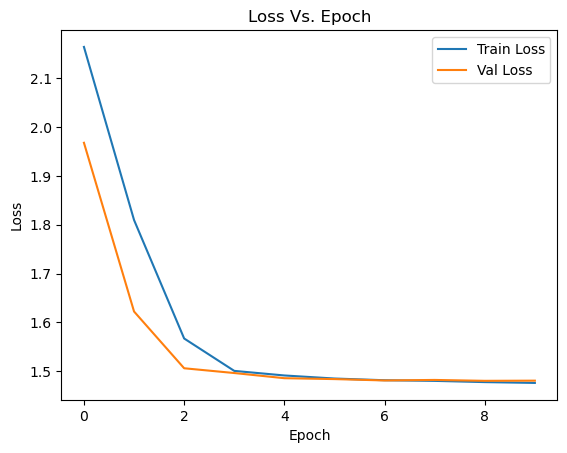

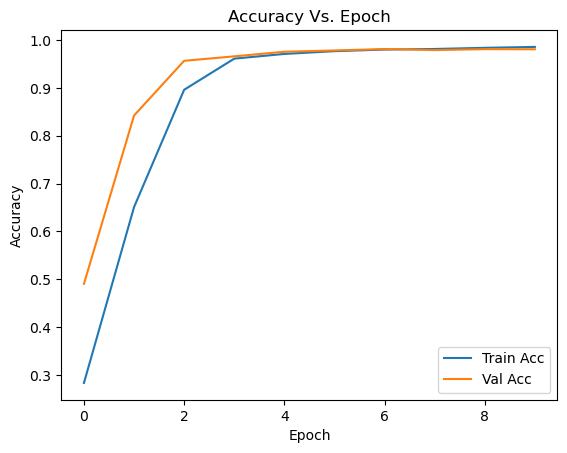

In [13]:
train_losses, val_losses, train_acc, val_acc = trainer.get_train_summary().values()

print(val_losses)

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Loss Vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend()
plt.title('Accuracy Vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


## VGG11

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class VGG11Net(nn.Module):

    def __init__(self):
        super(VGG11Net, self).__init__()
        self.convs_layers = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1), 
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1), 
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1), 
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(256, 256, kernel_size=3, padding=1), 
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1), 
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) 
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 4096), 
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            
            nn.Linear(4096, 4096), 
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            
            nn.Linear(4096, 10) 
        )

    def forward(self, x):
        x = self.convs_layers(x) 
        x = torch.flatten(x, 1)  
        x = self.classifier(x) 
        return x


